Aim of Defect Detection Using CNN

The goal of this phase is to implement a Convolutional Neural Network (CNN) to automatically detect defective parts in the inventory using image data. This step directly supports the overarching project objective of creating an AI-powered inventory optimization system by:

📸 Automating Quality Control

Detect defects in car parts through image recognition, reducing manual inspection time and errors.

📉 Minimizing Defective Inventory Costs

Identify and exclude defective items from stock early, reducing costs associated with faulty products.

📊 Enhancing Supply Chain Efficiency

Improve overall efficiency by ensuring only defect-free parts are included in the inventory system.

📈 Boosting Decision-Making Accuracy

Integrate defect detection data with inventory optimization for smarter stock replenishment.

🚀 Creating an End-to-End AI-Driven System

Combine demand forecasting, inventory optimization, and defect detection into a unified, intelligent system.

🔍 Proposed Steps for CNN Defect Detection

📂 Data Preparation

Load image data and metadata.

Label images as defective or non-defective based on metadata.

🏗️ Build CNN Model

Define the CNN architecture with convolution, pooling, and dense layers.

Implement regularization techniques to prevent overfitting.

🏋️ Train and Validate the Model

Train the CNN using labeled data.

Use validation datasets to measure accuracy and loss.

📏 Model Evaluation

Evaluate using metrics like precision, recall, F1-score, and confusion matrix.

Visualize training performance using loss and accuracy curves.

🎯 Defect Prediction and Integration

Use the trained model to classify new images.

Integrate defect predictions into the inventory system for real-time quality control.

In [5]:
# Data Handling and Visualization
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# TensorFlow and Keras Modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K


In [6]:
# 📦 Import Required Libraries
import os
import numpy as np
import pandas as pd
import cv2
import json

# -------------------------------
# 🔗 Step 1: Define Paths and Parameters
# -------------------------------
img_size = 224  # Resize images to 128x128 pixels
# Define directories for images and annotations
non_damaged_img_dir = '/Users/adityasrivatsav/Documents/GitHub/-SmartStock-AI-powered-inventory-optimization-and-demand-forecasting/data/raw/archive (13)/Car parts dataset/File1/img'
non_damaged_ann_dir = '/Users/adityasrivatsav/Documents/GitHub/-SmartStock-AI-powered-inventory-optimization-and-demand-forecasting/data/raw/archive (13)/Car parts dataset/File1/ann'

damaged_img_dir = '/Users/adityasrivatsav/Documents/GitHub/-SmartStock-AI-powered-inventory-optimization-and-demand-forecasting/data/raw/archive (13)/Car damages dataset/File1/img'
damaged_ann_dir = '/Users/adityasrivatsav/Documents/GitHub/-SmartStock-AI-powered-inventory-optimization-and-demand-forecasting/data/raw/archive (13)/Car damages dataset/File1/ann'

# Define image size for ResNet50
img_size = 224  # ResNet50 expects input size of 224x224 pixels

# Supported file extensions
supported_extensions = ['.png']

# Function to load and preprocess images
def load_images(image_dir, label):
    images = []
    labels = []
    for image_file in os.listdir(image_dir):
        if image_file.endswith(tuple(supported_extensions)):
            img_path = os.path.join(image_dir, image_file)
            image = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_size, img_size))
            image = tf.keras.preprocessing.image.img_to_array(image) / 255.0  # Normalize image
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load images
non_damaged_images, non_damaged_labels = load_images(non_damaged_img_dir, 0)
damaged_images, damaged_labels = load_images(damaged_img_dir, 1)

# Combine datasets
images = np.concatenate((non_damaged_images, damaged_images), axis=0)
labels = np.concatenate((non_damaged_labels, damaged_labels), axis=0)


In [7]:
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print dataset sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 1141
Validation set size: 244
Testing set size: 245


In [8]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    zoom_range=0.3
)
datagen.fit(X_train)

In [9]:
# Load ResNet50 without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the ResNet50 base model
base_model.trainable = False

# Define the defect detection model using ResNet50
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 38s 986ms/step - accuracy: 0.5324 - loss: 0.7547 - val_accuracy: 0.5533 - val_loss: 0.6996
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 36s 1000ms/step - accuracy: 0.5119 - loss: 0.7671 - val_accuracy: 0.5533 - val_loss: 0.6891
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4875 - loss: 0.7991 - val_accuracy: 0.5533 - val_loss: 0.7151
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5041 - loss: 0.7598 - val_accuracy: 0.5533 - val_loss: 0.6877
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5018 - loss: 0.7466 - val_accuracy: 0.5533 - val_loss: 0.6891
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5292 - loss: 0.7259 - val_accuracy: 0.5574 - val_loss: 0.6906
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5223 - loss: 0.7144 - val_accuracy: 0.5533 - val_loss: 0.7007
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5228 - loss: 0.7208 - val_accuracy: 0.5533 - va

In [11]:
# Unfreeze last 30 layers for fine-tuning
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 30
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Retrain the model
history_fine_tune = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.5309 - loss: 0.7141 - val_accuracy: 0.5369 - val_loss: 0.6917
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.5247 - loss: 0.7114 - val_accuracy: 0.4549 - val_loss: 0.7062
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.4892 - loss: 0.7209 - val_accuracy: 0.4508 - val_loss: 0.7177
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 463s 13s/step - accuracy: 0.5370 - loss: 0.6946 - val_accuracy: 0.4180 - val_loss: 0.7119
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5637 - loss: 0.7000 - val_accuracy: 0.4098 - val_loss: 0.7068
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5433 - loss: 0.7002 - val_accuracy: 0.4754 - val_loss: 0.7131


In [12]:
# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Fine-tuned Test Accuracy: {test_accuracy * 100:.2f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 829ms/step - accuracy: 0.6063 - loss: 0.6865
Fine-tuned Test Accuracy: 55.51%


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step  


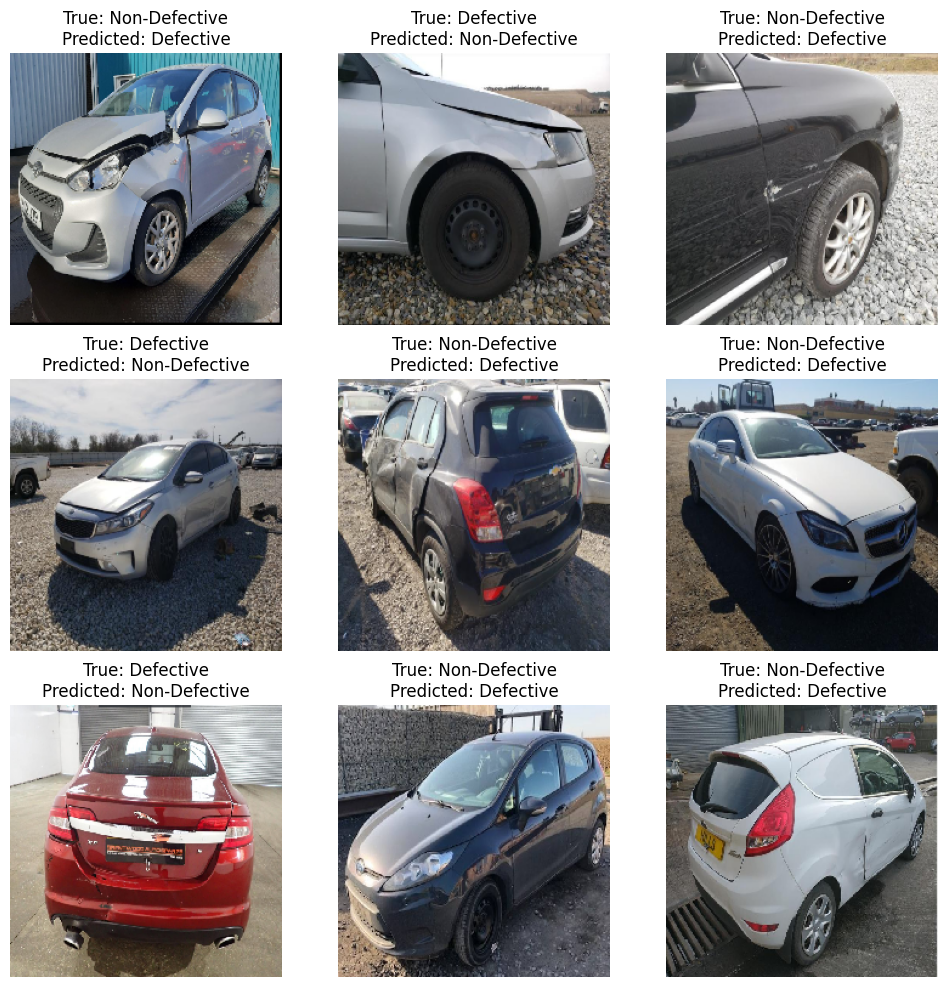

In [13]:
# Predict on test set
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Identify misclassifications
misclassified_indices = np.where(predicted_labels != y_test)[0]

# Display misclassified images
plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {'Defective' if y_test[idx] else 'Non-Defective'}\nPredicted: {'Defective' if predicted_labels[idx] else 'Non-Defective'}")
    plt.axis('off')
plt.show()


In [17]:
import os
import joblib

# Define the save path
save_model_path = '/Users/adityasrivatsav/Documents/GitHub/-SmartStock-AI-powered-inventory-optimization-and-demand-forecasting/models/trained_cnn_resnet_model.keras'

# Create directory if it doesn't exist
os.makedirs(os.path.dirname(save_model_path), exist_ok=True)

# Save the trained model using Joblib
joblib.dump(model, save_model_path)

print(f"✅ Model successfully saved using Joblib at {save_model_path}")


✅ Model successfully saved using Joblib at /Users/adityasrivatsav/Documents/GitHub/-SmartStock-AI-powered-inventory-optimization-and-demand-forecasting/models/trained_cnn_resnet_model.keras
